This file serves as a playground file to read and visualized the data

normalize first, then add padding

In [1]:
import torch
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
import sys

data_dir = "/home/icip_2025/data"

Reading in labels

In [3]:
train_dir = join(data_dir, "train")

datasets = os.listdir(train_dir)

shape = None

sizes = []
dataset_sizes = []
images = []
dataset_n_images = []
image_names = []

for dataset in datasets:
    dataset_path = join(train_dir, dataset)
    dataset_images = os.listdir(dataset_path)

    d_sizes = []

    dataset_n_images.append(len(dataset_images))

    for image_name in dataset_images:
        image_path = join(dataset_path, image_name)
        image = plt.imread(image_path)

        s = image.shape
        s = s if s[1] / s[0] > 1 else (s[1], s[0], 3)
        sizes.append(s)
        d_sizes.append(s)
        images.append(image)
        image_names.append(image_name)


    dataset_sizes.append(d_sizes)

Viewing Scenes

In [5]:
sizes = np.array(sizes)

sizes.mean(axis = 0), sizes.min(axis = 0), sizes.max(axis = 0), np.median(sizes, axis = 0)

(array([ 849.13984576, 1235.15526992,    3.        ]),
 array([117, 204,   3]),
 array([4032, 6048,    3]),
 array([ 700., 1024.,    3.]))

In [6]:
aspect_ratios = sizes[:, 1] / sizes[:, 0]

In [7]:
aspect_ratios.var()

np.float64(0.03882707177657215)

(array([ 49.,  59., 818., 491.,  49., 463.,  12.,   1.,   0.,   3.]),
 array([1.        , 1.13432494, 1.26864989, 1.40297483, 1.53729977,
        1.67162471, 1.80594966, 1.9402746 , 2.07459954, 2.20892449,
        2.34324943]),
 <BarContainer object of 10 artists>)

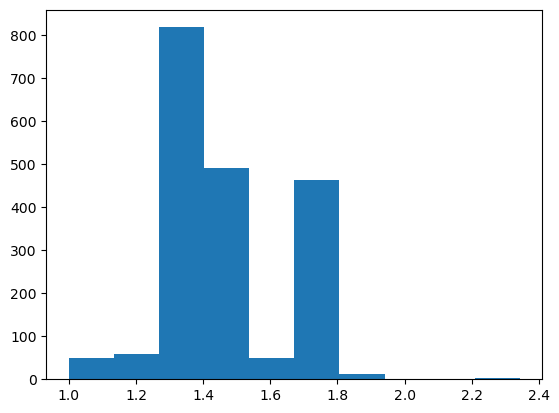

In [8]:
plt.hist(aspect_ratios, bins = 10)

(array([215.,  50., 751., 676.,   6.,  75.,   0.,   5.,   1.,   2.,   0.,
         68.,   0.,   0.,   0.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   9.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         73.]),
 array([2.38680000e+04, 2.67484680e+05, 5.11101360e+05, 7.54718040e+05,
        9.98334720e+05, 1.24195140e+06, 1.48556808e+06, 1.72918476e+06,
        1.97280144e+06, 2.21641812e+06, 2.46003480e+06, 2.70365148e+06,
        2.94726816e+06, 3.19088484e+06, 3.43450152e+06, 3.67811820e+06,
        3.92173488e+06, 4.1653

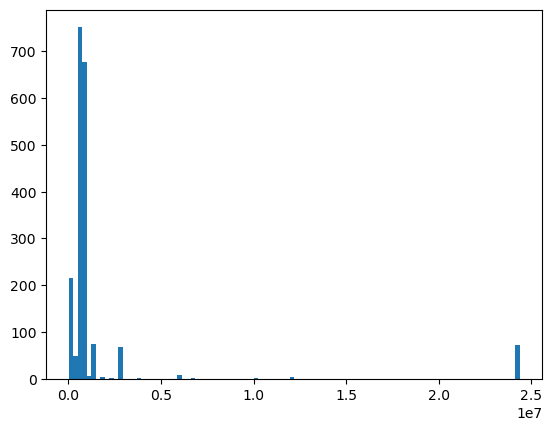

In [33]:
plt.hist(sizes[:, 0] * sizes[:, 1], bins = 100)
# plt.xlim(0, 0.5e7)

In [11]:
image_sizes = sizes[:, 0] * sizes[:, 1]

In [91]:
image_sizes.argsort()[-500]

np.int64(1417)

In [2]:
labels = pd.read_csv(join(data_dir, "train_labels.csv"))

In [3]:
labels

,dataset,scene,image,rotation_matrix,translation_vector
0,imc2023_haiper,fountain,fountain_image_116.png,0.122655949;0.947713775;-0.294608417;0.1226706...,0.093771314;-0.803560988;2.062001533
1,imc2023_haiper,fountain,fountain_image_108.png,0.474305910;0.359108654;-0.803787832;0.2888416...,0.358946647;-0.797557548;1.910906929
2,imc2023_haiper,fountain,fountain_image_101.png,0.565115476;-0.138485064;-0.813305838;0.506678...,0.146922468;-0.981392596;2.009002852
3,imc2023_haiper,fountain,fountain_image_082.png,-0.308320392;-0.794654112;0.522937261;0.948141...,0.206413831;-1.174321103;3.667167680
4,imc2023_haiper,fountain,fountain_image_071.png,-0.569002830;-0.103808175;0.815757098;0.778745...,-0.015140892;-1.334052012;3.488936597
...,...,...,...,...,...
1940,stairs,stairs_split_2,stairs_split_2_1710453733751.png,0.961762441;-0.187990401;0.199179859;-0.177691...,-0.112850000;-3.521750000;-2.859750000
1941,stairs,stairs_split_2,stairs_split_2_1710453759963.png,0.237960308;0.580896704;-0.778417569;0.4077886...,-0.490768000;-3.064140000;3.008420000
1942,stairs,stairs_split_2,stairs_split_2_1710453805788.png,0.309067298;0.541767194;-0.781642957;0.4038963...,-0.572757000;0.885835000;4.987270000
1943,stairs,stairs_split_2,stairs_split_2_1710453765165.png,0.301920210;0.609614467;-0.732949103;0.5007116...,-0.135613000;-1.832910000;1.598790000


In [4]:
import torch
import numpy as np

In [7]:
Z = torch.from_numpy(np.array([
    [0, 0],
    [0, 0],
    [0, 0]
]))

C = torch.from_numpy(np.array([
    [1, 1],
    [2, 2]
]))

In [26]:
torch.linalg.vector_norm((1 + Z.unsqueeze(1) - C.unsqueeze(0)).float(), dim = -1).shape

torch.Size([3, 2])

In [27]:
hollow_matrix = torch.ones((3, 3))

In [42]:
hollow_matrix = torch.ones((3, 3))
inds = list(range(hollow_matrix.shape[0]))

hollow_matrix[inds, inds]= 0


In [48]:
Q_2 = torch.ones(size = (3, 3))
f = torch.tensor([1, 2, 3])

In [49]:
Q_2 / f.unsqueeze(0)

tensor([[1.0000, 0.5000, 0.3333],
        [1.0000, 0.5000, 0.3333],
        [1.0000, 0.5000, 0.3333]])

In [93]:
labels.iloc[1844]

dataset                                                    fbk_vineyard
scene                                                  vineyard_split_1
image                                   vineyard_split_1_frame_1085.png
rotation_matrix       -0.6217828205139999;0.19214071264399996;-0.759...
translation_vector                             541.225;-38.2184;122.981
Name: 1844, dtype: object

In [94]:
sizes[1417]

array([ 774, 1042,    3])

In [96]:
images = np.random.randn(512, 64, 64, 3)

In [97]:
torch.tensor([[1], [2, 3]])

ValueError: expected sequence of length 1 at dim 1 (got 2)

In [90]:
image_sizes

array([ 230400,  230400,  230400, ..., 1310720, 1310720, 1310720],
      shape=(1945,))